# XY-calibration (F1)

In [1]:
cd ..

/Users/Vincent/Github/FireBallPipe


# Summary

| #  | Name                               | Done                    | Time supposed | Effective time | |
|----|------------------------------------|-------------------------|---------------|----------------|-|
| 1  | Rotate mask carousel               | <input type="checkbox"> | 2             |                | |
| 2  | Take diffuse image                 | <input type="checkbox"> | 2             |                | |
| 3  | Set guider at best focus           | <input type="checkbox"> | 5             |                | |
| 4  | Align siderostat frames            | <input type="checkbox"> | 0             |                | |
| 5  | Go to guider reference             | <input type="checkbox"> | 2             |                | |
| 6  | Set UV/guider best focus offset    | <input type="checkbox"> | 2             |                | |
| 7  | Rotate mask carousel               | <input type="checkbox"> | 3             |                | |
| 8  | Through focus in UV                | <input type="checkbox"> | 5             |                | |
| 9  | Note open-mask guider ref point    | <input type="checkbox"> | 2             |                | |
| 10 | Go through the list of slits       | <input type="checkbox"> | 20            |                | |
| 11 | Note open-mask guider ref point    | <input type="checkbox"> | 2             |                | |
| 12 | Update model                       | <input type="checkbox"> | 10            |                | |
| 13 | Rotate carousel to science mask    | <input type="checkbox"> | 3             |                | |
| 14 | Note open-mask guider ref point    | <input type="checkbox"> | 2             |                | |
| 15 | Check new model on Science mask    | <input type="checkbox"> | 20            |                | |
| 16 | Note science-mask guider ref point | <input type="checkbox"> | 2             |                | |
| 17 | Go through the list of GS          | <input type="checkbox"> | 15            |                | |
| 18 | Through focus guide star 1         | <input type="checkbox"> | 5             |                | |
| 19 | Track mask to guider changes       | <input type="checkbox"> | 2             |                | |

In [38]:
%matplotlib widget
%load_ext autoreload
%autoreload 2

import sys
import numpy as np
from astropy.io import fits
from astropy import wcs, coordinates
from astropy import units as u
from astropy.wcs.utils import proj_plane_pixel_scales
from matplotlib import pyplot as plt
from astropy.table import Table, vstack 
import matplotlib.patches as patches
import unittest
from mpl_interactions import heatmap_slicer
import pandas as pd
# os.chdir(os.path.dirname(os.path.realpath(__file__)))
sys.path.insert(1, './Calibration')
from guider2UV.guider2UV import Guider2UV, diff_skycoord, fit_model, plot_fit
from Calibration.mapping import Mapping

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## initialization from last xy calib
---------------------------------

In [3]:
# prerequisites:
previous_xy_mapping = 'Notebook/Files/Guider2UV_F1_nogamma.new.pkl'
mask_det_map_file = "Calibration/Mappings/2022/mapping-mask-det-w-2022-5-F1.pkl"
target_filename = 'Calibration/Targets/2022/targets_F1.txt'
mapping_diffuse_image = "/Users/Vincent/Nextcloud/LAM/FIREBALL/TestsFTS2018-Flight/E2E-AIT-Flight/all_diffuse_illumination/FocusEvolution/F1/F1_2022_6_-82.fits"
new_diffuse_image = "/Users/Vincent/Nextcloud/LAM/FIREBALL/TestsFTS2018-Flight/E2E-AIT-Flight/all_diffuse_illumination/FocusEvolution/F1/F1_2022_6_-106.fits"

In [4]:
G2UV = Guider2UV(filename=previous_xy_mapping)
F1 = Table.read(target_filename, format='ascii')
mask_det_map = Mapping(mask_det_map_file)

# print(G2UV)

FOV center angular position in guider <SkyCoord (SkyOffsetICRS: rotation=0.0 deg, origin=<ICRS Coordinate: (ra, dec) in deg
    (250.39272815, 36.41856381)>): (lon, lat) in deg
    (0.17639951, 0.0154012)>
FOV center pixel position in guider [array(1338.56657245), array(600.7867847)]


## Alternative initialisation for new fields:
---------------------------------------

In [5]:

# # prerequisites:
# previous_xy_mapping = 'Notebook/Files/Guider2UV_F1_nogamma.new.pkl'
# mask_det_map_file = "Calibration/Mappings/2022/mapping-mask-det-w-2022-5-F1.pkl"
# target_filename = 'Calibration/Targets/2022/targets_F1.txt'
# mapping_diffuse_image = "/Users/Vincent/Nextcloud/LAM/FIREBALL/TestsFTS2018-Flight/E2E-AIT-Flight/all_diffuse_illumination/FocusEvolution/F1/F1_2022_6_-82.fits"
# new_diffuse_image = "/Users/Vincent/Nextcloud/LAM/FIREBALL/TestsFTS2018-Flight/E2E-AIT-Flight/all_diffuse_illumination/FocusEvolution/F1/F1_2022_6_-106.fits"

# f_ra, f_dec, f_rot = 0, 0, 0
# Field_center=coordinates.SkyCoord(f_ra * u.deg, f_dec * u.deg)
# # get FOVcenter & guider wcs from another field
# #  put pkl from a functionning mapping from another field
# G2UVother = Guider2UV(filename=previous_xy_mapping)
# FOVcenter = G2UVother.FOV_center_guider_coord
# guider_wcs = G2UVother.GuiderP.w
# G2UV = Guider2UV(Field_center=Field_center,
#                  Field_rotation= f_rot * u.deg,
#                  Field_gamma=1.0,  # platescale correction (need to update the polynomial in the MaskAstrometry.py)
#                  FOVcenter_guider_coord=FOVcenter,
#                  guider_wcs = guider_wcs,
#                  )
                 
# FNEW = Table.read(target_filename, format='ascii')
# mask_det_map = Mapping(mask_det_map_file)

# # print(G2UV)

## 1-  Rotate mask carousel
## 2- Diffuse UV image

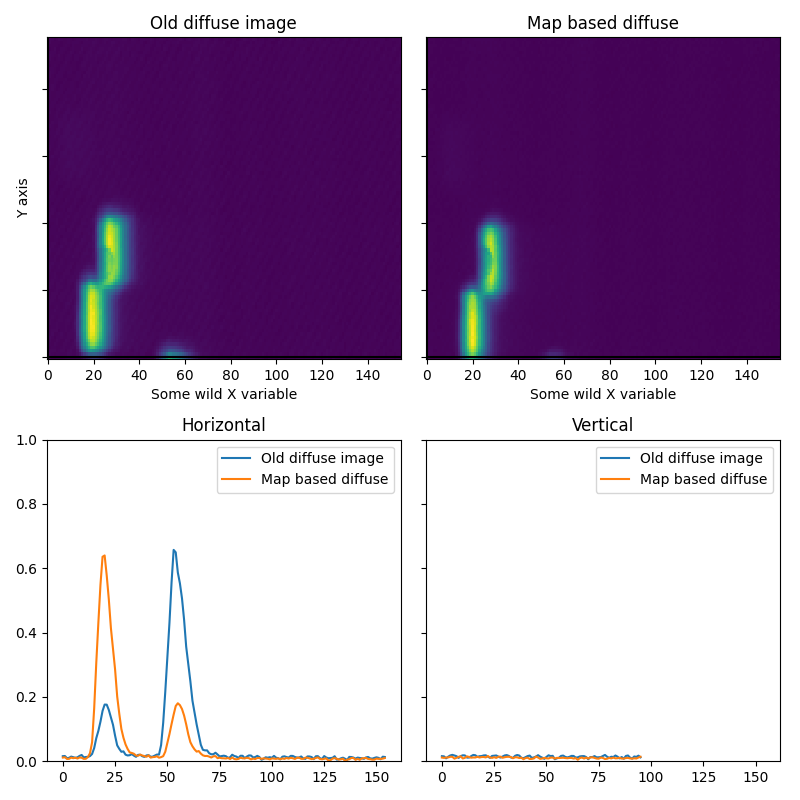

In [6]:
data1 = fits.open(mapping_diffuse_image)[0].data[1404:1500,1925:2080]
data2 = fits.open(new_diffuse_image)[0].data[1404:1500,1925:2080]
data1 = (data1-data1.min()) / (data1-data1.min()).ptp()
data2 = (data2-data2.min()) / (data2-data2.min()).ptp()
fig, axes = heatmap_slicer(
    np.arange(data2.shape[1]),
    np.arange(data2.shape[0]),
    (data1, data2),
    slices="both",
    figsize = (8,8),
    heatmap_names=("Old diffuse image", "Map based diffuse"),
    labels=("Some wild X variable", "Y axis"),
    interaction_type="click")
plt.tight_layout()
plt.show()



In [7]:
offset = np.array([5., 10.])
G2UV.set_detector_mapping(mask_det_map, offsets = offset+1)


## 3 - Set guider at best focus          
## 4 - Align siderostat frames           
## 5 - Go to guider reference            
## 6 - Set UV/guider best focus offset   
## 7 - Rotate mask carousel              
## 8 - Through focus in UV               
## 9 - Note open-mask guider ref point   
    

## 10 - Go through the list of slits      

GC - 46 - 51 - 14 - 8 - 12 - 16 - 38 - 44

In [76]:
slits = ['46', '51', '14', '8', '12', '16', '38', '44'] 
# mask = F1.to_pandas()['Internal-count'].isin(slits)
F1p = F1.to_pandas()
from functools import reduce
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# selected_slits = F1[mask.values]['Internal-count',"x_mm","y_mm","ra","dec"]
selected_slits = Table.from_pandas((reduce(pd.DataFrame.append, map(lambda i: F1p[F1p['Internal-count'] == i],slits))))

movs, slits_coord = G2UV.compute_autocoll_moves_slits(slits, F1, hystcomp = True)

assert movs.sum(axis=0)[0] <0.1
assert movs.sum(axis=0)[1] <0.1
selected_slits = selected_slits['Internal-count',"x_mm","y_mm","ra","dec"]
slit_path = vstack((selected_slits,selected_slits[::-1]) )
# slit_path['lon'] = [s.lon.deg*3600 for s in slits_coord]
# slit_path['lat'] =  [s.lat.deg*3600 for s in slits_coord]
# slit_path


slit position in mm on mask: [ 6.7589561 -3.858979 ]
slit position in mm on mask: [8.6160157 1.0303866]
slit position in mm on mask: [-5.1696728  3.934102 ]
slit position in mm on mask: [-8.8972191 -0.6960435]
slit position in mm on mask: [-7.6793793 -2.8581218]
slit position in mm on mask: [-4.190085  -1.2881544]
slit position in mm on mask: [ 3.7831595 -2.1462593]
slit position in mm on mask: [6.2134041 2.5275849]

targets local coords in siderostat local frame:
EL: 159.4 arcsec ; CE: 256.9 arcsec
EL: 369.0 arcsec ; CE: 329.0 arcsec
EL: 478.0 arcsec ; CE: -245.0 arcsec
EL: 277.5 arcsec ; CE: -394.8 arcsec
EL: 187.0 arcsec ; CE: -342.1 arcsec
EL: 257.3 arcsec ; CE: -199.1 arcsec
EL: 229.1 arcsec ; CE: 131.8 arcsec
EL: 430.1 arcsec ; CE: 227.8 arcsec

siderostat moves sequence: 
EL: 0.0 arcsec ; CE -30.0 arcsec ; image: False
EL: -0.0 arcsec ; CE 30.0 arcsec ; image: True
EL: 159.4 arcsec ; CE 256.9 arcsec ; image: True
EL: 209.6 arcsec ; CE 72.0 arcsec ; image: True
EL: 109.0 arcsec ;

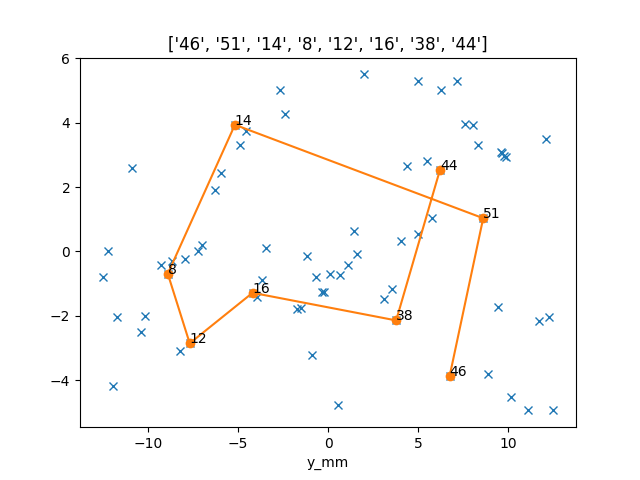

In [82]:
plt.figure()
plt.plot(F1["x_mm"],F1["y_mm"],"x")
plt.plot(selected_slits["x_mm"],selected_slits["y_mm"],"-o")
for s in selected_slits:
    plt.text(s["x_mm"],s["y_mm"],s["Internal-count"])
plt.xlabel("x_mm")
plt.xlabel("y_mm")
plt.title(slits)
plt.show()

observed slits position :

In [85]:
slits_coord_obs_det = np.array([
       [1965.59756538,  420.22242579],
       [1631.74361865,  289.23423754],
       [1467.73408468, 1349.36778046],
       [1784.27150004, 1626.79774278],
       [1927.70920124, 1532.48181218],
       [1818.74748265, 1266.98195373],
       [1859.64545293,  654.1904897 ],
       [1539.18268865,  478.63015312],
#retour
       [1538.98978056,  473.42365165],
       [1859.70918054,  650.33623459],
       [1819.23982594, 1263.17030059],
       [1927.97229623, 1527.29654425],
       [1784.71779993, 1630.64211506],
       [1468.24324699, 1354.89013602],
       [1631.89394058,  287.11784832],
       [1966.20476903,  416.24326822]])

slit_path["x_det_obs"] = slits_coord_obs_det[:,0]
slit_path["y_det_obs"] = slits_coord_obs_det[:,1]
slit_path

Internal-count,x_mm,y_mm,ra,dec,x_det_obs,y_det_obs
str2,float64,float64,float64,float64,float64,float64
46,6.7589561,-3.858979,32.350896,-5.779373,1965.59756538,420.22242579
51,8.6160157,1.0303866,32.395107,-5.663555,1631.74361865,289.23423754
14,-5.1696728,3.934102,32.06701,-5.594838,1467.73408468,1349.36778046
8,-8.8972191,-0.6960435,31.97817,-5.704451,1784.27150004,1626.79774278
12,-7.6793793,-2.8581218,32.007183,-5.755669,1927.70920124,1532.48181218
16,-4.190085,-1.2881544,32.090328,-5.718481,1818.74748265,1266.98195373
38,3.7831595,-2.1462593,32.279995,-5.738793,1859.64545293,654.1904897
44,6.2134041,2.5275849,32.336883,-5.628133,1539.18268865,478.63015312
44,6.2134041,2.5275849,32.336883,-5.628133,1538.98978056,473.42365165


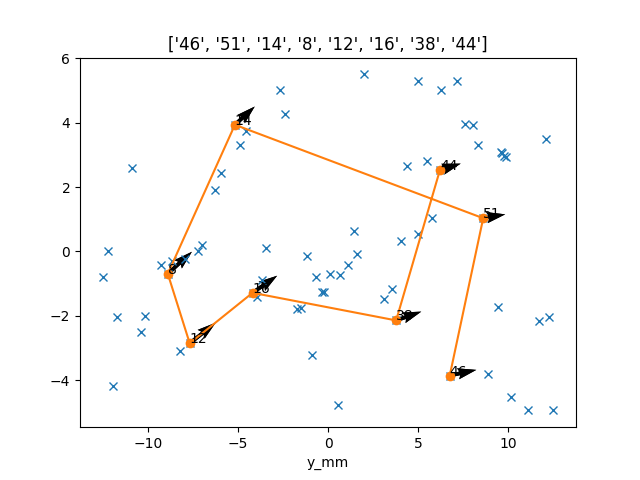

In [87]:
# TODO create some quiver of the error
plt.figure()
plt.plot(F1["x_mm"],F1["y_mm"],"x")
plt.plot(selected_slits["x_mm"],selected_slits["y_mm"],"-o")
for s in selected_slits:
    plt.text(s["x_mm"],s["y_mm"],s["Internal-count"])
plt.quiver(slit_path["x_mm"],slit_path["y_mm"],slit_path["x_det_obs"],slit_path["y_det_obs"])
plt.xlabel("x_mm")
plt.xlabel("y_mm")
plt.title(slits)
plt.show()

In [88]:
valid = np.isfinite(slits_coord_obs_det[:,0])
#valid = np.array([True]*8 + [False]*8)
try:
    obs_wave = G2UV.mask_det_map.w[0]
except TypeError:
    obs_wave = 0.2139
print("wave: ", obs_wave)
slits_coord_valid = [slits_coord[i] for i in np.nonzero(valid)[0]]
slits_valid = np.array(slits + slits[::-1])[valid]

wave:  0.2139


### look at siderostat frame hysteresis 

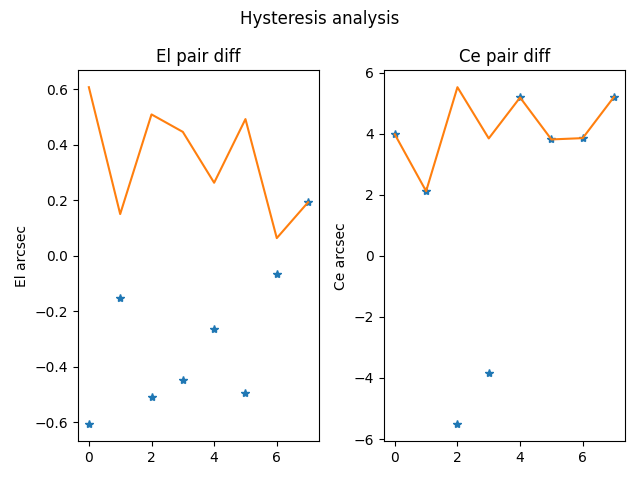

In [92]:
mid  = len(slits_coord_obs_det)//2
pair_diff = slits_coord_obs_det[:mid] - slits_coord_obs_det[::-1][:mid]
pair_diff
fig, (ax0,ax1) = plt.subplots(1,2)
ax0.plot(pair_diff[:,0],'*')
ax0.plot(np.abs(pair_diff[:,0]),'-')
ax0.set_title("El pair diff")
ax0.set_ylabel("El arcsec")
ax1.plot(pair_diff[:,1],'*')
ax1.plot(np.abs(pair_diff[:,1]),'-')
ax1.set_title("Ce pair diff")
ax1.set_ylabel("Ce arcsec")
fig.suptitle("Hysteresis analysis")
fig.tight_layout()


## 11- Note open-mask guider ref point
## 12- Update model with observed slit positions

In [93]:
slits_coord_obs = G2UV.detector2guider(slits_coord_obs_det, wave=obs_wave, angle=True  )



Fitting rotation, translation and magnification
gamma: 1.258066316339834
theta: 166.8832988583862 arcmin
dx: 197.82417971391723 arcsec
dy: 154.89852600699732 arcsec
variances: [4.11192686e-04 1.41357633e+00 3.51871332e-01 3.51871332e-01]

residuals in arcsec: [[ 516.89201727 -160.23257135]
 [-213.59688703 -180.79303354]
 [-651.95819032  123.44067605]
 [  27.80534282  186.66949974]
 [ 352.15534953  157.25479867]
 [ 130.67652104   87.23374442]
 [ 265.85267842  -87.76934922]
 [-429.31660624 -117.48867771]
 [-429.53461414 -123.41414961]
 [ 265.94676683  -92.04697415]
 [ 131.38820843   83.03418108]
 [ 352.64874649  151.52572284]
 [  28.25835183  190.92918498]
 [-651.43891288  129.45475691]
 [-213.44536199 -183.19427046]
 [ 517.66658995 -164.60353866]]
max residual in EL,CE 652.0, 190.9 arcsec
mean residual in EL,CE 376.7, 143.6 arcsec


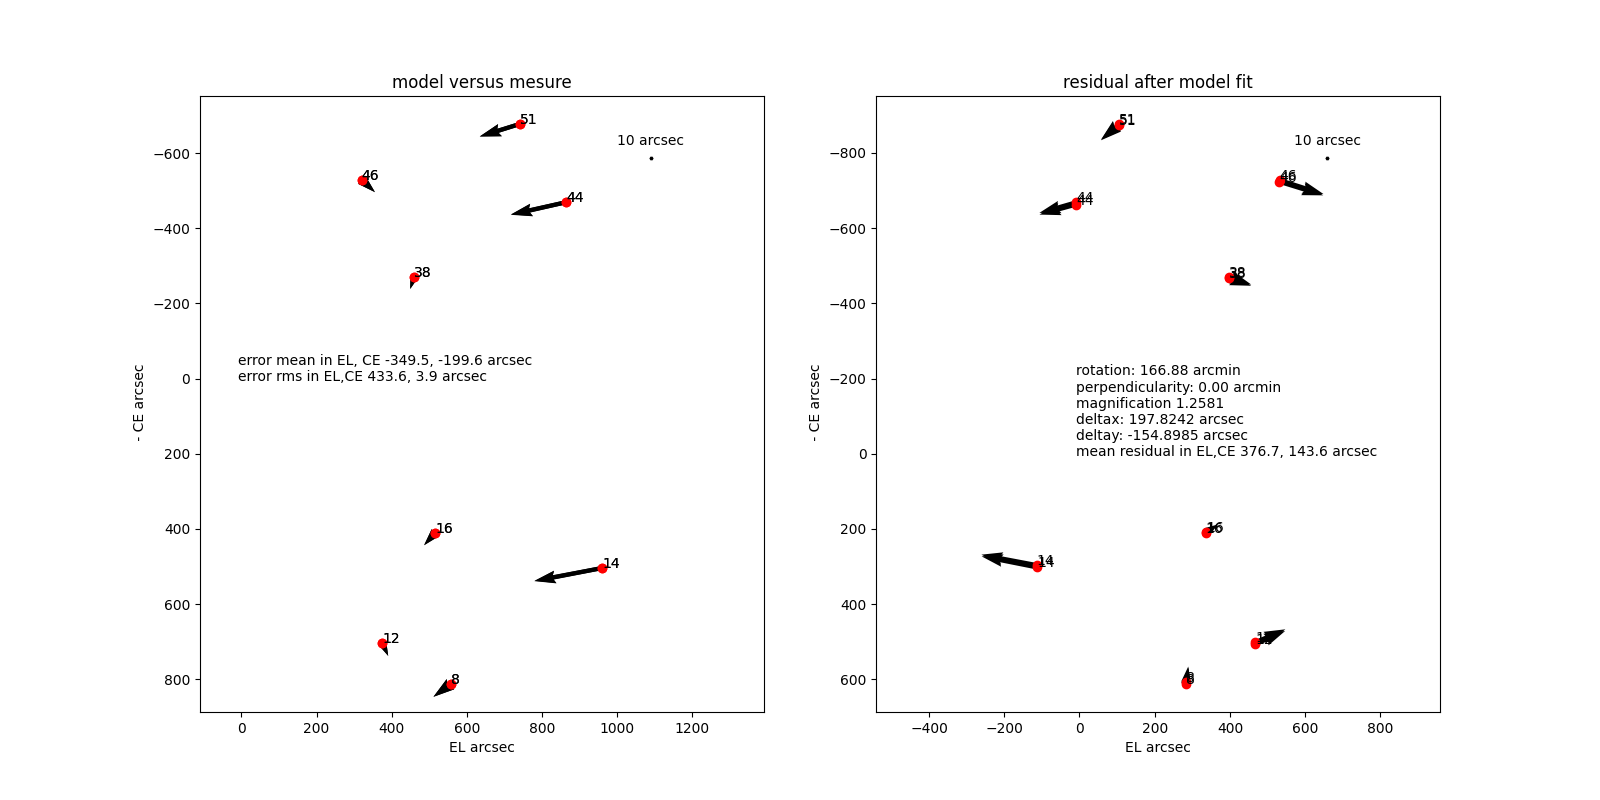

In [95]:
weight = np.array( [1.]*16  + [1./(1. + 1e-1)]*16)

G2UVcor, residuals = G2UV.update_model(slits_coord_valid, slits_coord_obs, labels=slits_valid, plot=True)

### save corrected model for future use (eg redo the clalib on same field)

In [96]:
#G2UVcor.save(filename=cloudpath + 'TestsFTS2018-Flight/E2E-AIT-Flight/XYCalibration/F1_180904.pkl')

## 13 - Rotate carousel to science mask
## 14 - Note open-mask guider ref point
## 15 - Check corrected model through science mask

In [97]:
movs_new, slits_coord_new = G2UVcor.compute_autocoll_moves_slits(slits, F1, hystcomp = True)

slit position in mm on mask: [ 6.7589561 -3.858979 ]
slit position in mm on mask: [8.6160157 1.0303866]
slit position in mm on mask: [-5.1696728  3.934102 ]
slit position in mm on mask: [-8.8972191 -0.6960435]
slit position in mm on mask: [-7.6793793 -2.8581218]
slit position in mm on mask: [-4.190085  -1.2881544]
slit position in mm on mask: [ 3.7831595 -2.1462593]
slit position in mm on mask: [6.2134041 2.5275849]

targets local coords in siderostat local frame:
EL: 315.3 arcsec ; CE: 242.8 arcsec
EL: 583.8 arcsec ; CE: 321.0 arcsec
EL: 685.1 arcsec ; CE: -408.4 arcsec
EL: 423.3 arcsec ; CE: -585.2 arcsec
EL: 312.5 arcsec ; CE: -513.4 arcsec
EL: 410.0 arcsec ; CE: -337.4 arcsec
EL: 395.3 arcsec ; CE: 81.1 arcsec
EL: 654.4 arcsec ; CE: 190.0 arcsec

siderostat moves sequence: 
EL: 0.0 arcsec ; CE -30.0 arcsec ; image: False
EL: -0.0 arcsec ; CE 30.0 arcsec ; image: True
EL: 315.3 arcsec ; CE 242.8 arcsec ; image: True
EL: 268.5 arcsec ; CE 78.3 arcsec ; image: True
EL: 101.3 arcsec ; 


## 16 - Note science-mask guider ref point
## 17 - Go through the Star sequence 
gc - s8 - s25 - s31

In [100]:
F1_stars

Internal count,RA,DEC,X,Y,GAIA gband,SDSS gband,SDSS rband,Xguider,Yguider
int64,float64,float64,float64,float64,int64,int64,int64,float64,float64
1,32.013184,-5.915665,-7.48408,-9.6891,--,12,12,440.9124046444624,1323.950053278314
2,32.020547,-5.661154,-7.175632,1.141346,--,--,14,1451.1787947987852,1252.4532712091507
3,32.034062,-5.89055,-6.60067,-8.620103,--,--,11,541.5317408869414,1234.742148613271
4,32.072615,-5.782639,-4.969689,-4.02771,--,--,14,972.5810278267935,1065.4595692375144
5,32.07864,-5.743487,-4.714935,-2.361612,8,--,--,1126.3379121742703,1037.4798272352696
6,32.083434,-5.691844,-4.512372,-0.164002,12,12,11,1326.645784189235,1013.7019478277491
7,32.097313,-5.647305,-3.924974,1.731384,--,14,13,1496.1543953734658,956.4194917156194
8,32.1014,-5.786504,-3.751016,-4.191964,11,11,11,954.7166340246686,952.1343510310977
9,32.114044,-5.977712,-3.214646,-12.328493,--,--,9,169.58925256758806,919.4787186779341


In [111]:
star_target_path = "Calibration/Targets/2022/GuidingStars/F1_guidingstars.fits"

F1_stars = Table.read(star_target_path, format='fits').to_pandas()

stars = [8, 25, 31]
selected_stars = Table.from_pandas((reduce(pd.DataFrame.append, map(lambda i: F1_stars[F1_stars['Internal count'] == i],stars))))

star_movs, stars_coord = G2UVcor.compute_autocoll_move_stars(stars, F1_stars, hystcomp = True)
# stars_path = vstack((selected_stars,selected_stars[::-1]) )
# selected_stars['lon'] = [s.lon.deg*3600 for s in stars_coord]
# selected_stars['lat'] =  [s.lat.deg*3600 for s in stars_coord]
# selected_stars
stars_coord


star position Ra/Dec:  <SkyCoord (ICRS): (ra, dec) in deg
    [(32.1014, -5.786504)]>
star position Ra/Dec:  <SkyCoord (ICRS): (ra, dec) in deg
    [(32.221491, -5.776507)]>
star position Ra/Dec:  <SkyCoord (ICRS): (ra, dec) in deg
    [(32.254526, -5.815258)]>

targets local coords in siderostat local frame:
EL: 307.0 arcsec ; CE: -265.7 arcsec
EL: 340.5 arcsec ; CE: -58.0 arcsec
EL: 275.3 arcsec ; CE: 4.4 arcsec

siderostat moves sequence: 
EL: -0.0 arcsec ; CE 30.0 arcsec ; image: False
EL: 0.0 arcsec ; CE -30.0 arcsec ; image: True
EL: 307.0 arcsec ; CE -265.7 arcsec ; image: True
EL: 33.6 arcsec ; CE 207.7 arcsec ; image: True
EL: -65.2 arcsec ; CE 62.4 arcsec ; image: True
EL: -0.0 arcsec ; CE 30.0 arcsec ; image: False
EL: 0.0 arcsec ; CE -30.0 arcsec ; image: True
EL: 65.2 arcsec ; CE -62.4 arcsec ; image: True
EL: -33.6 arcsec ; CE -237.7 arcsec ; image: False
EL: 0.0 arcsec ; CE 30.0 arcsec ; image: True
EL: -307.0 arcsec ; CE 265.7 arcsec ; image: True


[<SkyCoord (SkyOffsetICRS: rotation=0.0 deg, origin=<ICRS Coordinate: (ra, dec) in deg
     (250.39272815, 36.41856381)>): (lon, lat) in deg
     [(0.17118275, 0.15192652)]>,
 <SkyCoord (SkyOffsetICRS: rotation=0.0 deg, origin=<ICRS Coordinate: (ra, dec) in deg
     (250.39272815, 36.41856381)>): (lon, lat) in deg
     [(0.18990415, 0.03317681)]>,
 <SkyCoord (SkyOffsetICRS: rotation=0.0 deg, origin=<ICRS Coordinate: (ra, dec) in deg
     (250.39272815, 36.41856381)>): (lon, lat) in deg
     [(0.15354835, -0.00251388)]>]


## 18 - Through focus guide star 1
## 19 - Track mask to guider changes
------------------------------------------------------

below stuf is not in the XY calib procedure, we should remove it

Re-compute model (thermal drift) ?

In [10]:
# slits_coord_obs_det2 = np.array([
#        [1967.77672211,  420.883372  ],
#        [1634.94667484,  284.99941421],
#        [1460.30889342, 1343.63228178],
#        [1774.05043782, 1625.66456504],
#        [1918.36655798, 1531.24794446],
#        [1811.96613007, 1264.73988401],
#        [1858.73062442,  652.77625595],
#        [1539.37281284,  472.87952084],
# #retour
#        [1538.92830776,  467.65309777],
#        [1858.32109489,  647.99384259],
#        [1811.64481037, 1260.92668703],
#        [1917.94530091, 1526.91879826],
#        [1773.67417428, 1628.30043431],
#        [1459.76904708, 1347.27853125],
#        [1634.04334215,  281.33418915],
#        [1966.71028008,  414.34595604]])
    
# slits_coord_obs_det2

In [11]:
# valid = np.isfinite(slits_coord_obs_det2[:,0])
# #valid = np.array([True]*8 + [False]*8)
# try:
#     obs_wave = G2UV.mask_det_map.w[0]
# except TypeError:
#     obs_wave = 0.2139
# print("wave: ", obs_wave)

# #slits_coord_valid = [slits_coord[i] for i in np.nonzero(valid)[0]]
# #slits_valid = np.array(slits + slits[::-1])[valid]

In [12]:
# mid  = len(slits_coord_obs_det2)//2
# pair_diff2 = slits_coord_obs_det2[:mid] - slits_coord_obs_det2[::-1][:mid]
# pair_diff2

# fig, (ax0,ax1) = plt.subplots(1,2)
# # plt.subplot('120')
# ax0.plot(pair_diff2[:,0],'*')
# ax0.plot(np.abs(pair_diff2[:,0]),'-')
# ax0.set_title("El pair diff")
# ax0.set_ylabel("El arcsec")
# # plt.subplot('121')
# ax1.plot(pair_diff2[:,1],'*')
# ax1.plot(np.abs(pair_diff2[:,1]),'-')
# ax1.set_title("Ce pair diff")
# ax1.set_ylabel("Ce arcsec")
# fig.suptitle("Hysteresis analysis")
# fig.tight_layout()



In [13]:
# valid2 = np.array([True]*16)
# valid2[[0,1,-1,-2]] = False
# slits2 = np.array(slits_valid)[valid2]
# print(slits2)

In [14]:
# slits_coord_obs2 = G2UV.detector2guider(slits_coord_obs_det2[valid2], wave=obs_wave, angle=True  )
# slits_coord_valid2 = [slits_coord[i] for i in np.nonzero(valid2)[0]]
# slits_valid2 = np.array(slits + slits[::-1])[valid2]

In [15]:
# weight = np.array( [1.]*14  + [1./(1. + 1e-1)]*14)

# G2UVcor2 = G2UV.update_model(slits_coord_valid2, slits_coord_obs2, labels=slits_valid2, plot=True)

In [16]:
# G2UVcor2 = G2UVcor2[0]
# star_movs2, stars_coord2 = G2UVcor2.compute_autocoll_move_stars(stars, F1_stars, hystcomp = True)


In [17]:
# movs_new2, slits_coord_new2 = G2UVcor2.compute_autocoll_moves_slits(slits, F1, hystcomp = True)